In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set_style('whitegrid')
data =data = {
        'Survived': [0, 1, 1, 0, 0, 1],
        'Pclass': [3, 1, 3, 1, 3, 2],
        'Sex': ['male', 'female', 'female', 'male', 'male', 'female'],
        'Age': [22, 38, 26, 35, 35, 27],
        'SibSp': [1, 1, 0, 1, 0, 0],
        'Parch': [0, 0, 0, 0, 0, 2],
        'Fare': [7.25, 71.28, 7.92, 53.1, 8.05, 12.0],
        'Embarked': ['S', 'C', 'S', 'S', 'S', 'S']
    }
df= pd.DataFrame(data)

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.25,S
1,1,1,female,38,1,0,71.28,C
2,1,3,female,26,0,0,7.92,S
3,0,1,male,35,1,0,53.10,S
4,0,3,male,35,0,0,8.05,S


In [5]:
print("\n--- DataFrame Information ---")

df.info()


--- DataFrame Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  6 non-null      int64  
 1   Pclass    6 non-null      int64  
 2   Sex       6 non-null      object 
 3   Age       6 non-null      int64  
 4   SibSp     6 non-null      int64  
 5   Parch     6 non-null      int64  
 6   Fare      6 non-null      float64
 7   Embarked  6 non-null      object 
dtypes: float64(1), int64(5), object(2)
memory usage: 516.0+ bytes


In [6]:
print("\n--- Descriptive Statistics for Numerical Columns ---")
df.describe()


--- Descriptive Statistics for Numerical Columns ---


,Survived,Pclass,Age,SibSp,Parch,Fare
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,0.500000,2.166667,30.500000,0.500000,0.333333,26.600000
std,0.547723,0.983192,6.348228,0.547723,0.816497,28.210565
min,0.000000,1.000000,22.000000,0.000000,0.000000,7.250000
25%,0.000000,1.250000,26.250000,0.000000,0.000000,7.952500
50%,0.500000,2.500000,31.000000,0.500000,0.000000,10.025000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,42.825000
max,1.000000,3.000000,38.000000,1.000000,2.000000,71.280000


In [ ]:
# Check for missing values (NaN) in each column
print("\n--- Missing Values Check ---")
print(df.isnull().sum())
# df.isnull()


--- Missing Values Check ---
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False


In [9]:
# Handle missing values: For the 'Age' column, let's fill missing values
# with the median age. The median is less sensitive to outliers than the mean.
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# For 'Embarked', we'll fill with the most common value (the mode)
mode_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(mode_embarked, inplace=True)

# Verify that missing values have been handled
print("\n--- Missing Values After Handling ---")
print(df.isnull().sum())


--- Missing Values After Handling ---
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


C:\Users\User\AppData\Local\Temp\ipykernel_13320\1496579198.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13320\1496579198.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

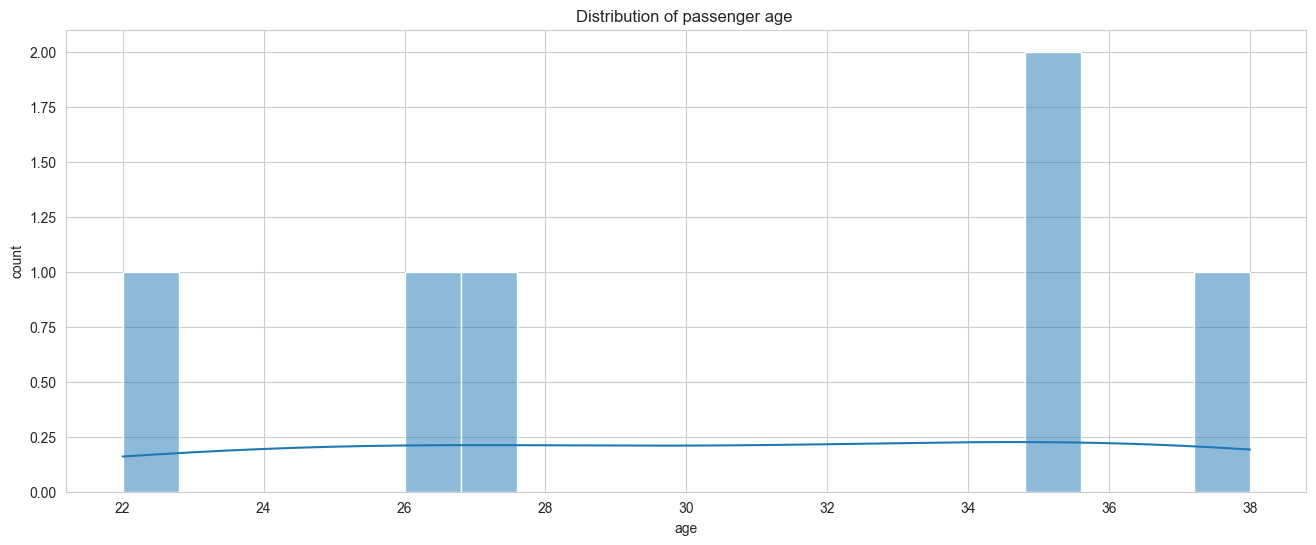

In [ ]:
#distribution of age 
# univarite anlaysis        
plt.figure(figsize=(16,6))
sns.histplot(df['Age'],kde=True,bins=20)
plt.xlabel("age")
plt.ylabel("count")
plt.title('Distribution of passenger age ')
plt.show()

---bivariate analysis---


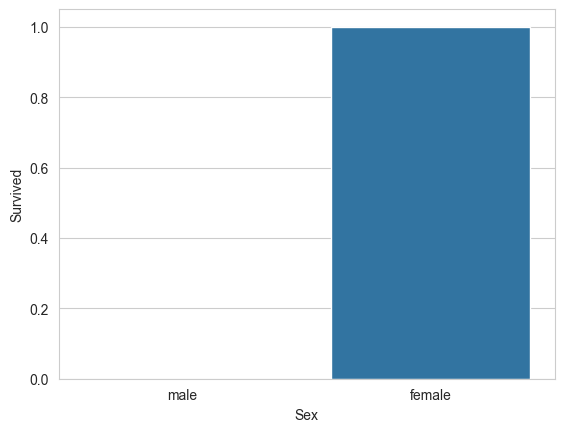

In [15]:
#bivariate analysis
print("---bivariate analysis---")
plt.Figure(figsize=(16,6))
sns.barplot(x='Sex',y='Survived',data =df)
plt.show()


multivariate analysis 


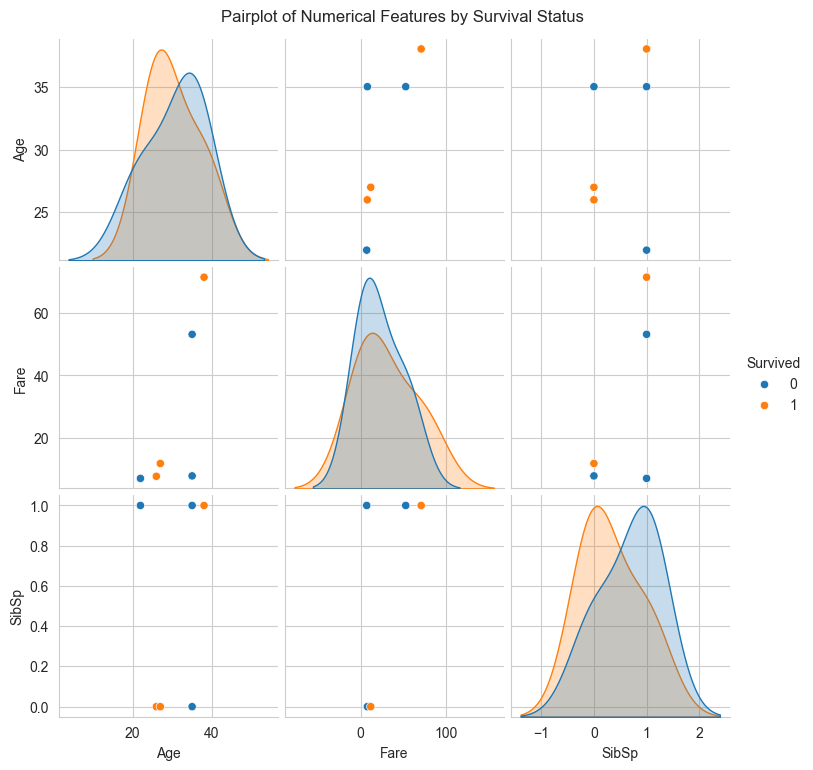


--- Correlation Heatmap ---


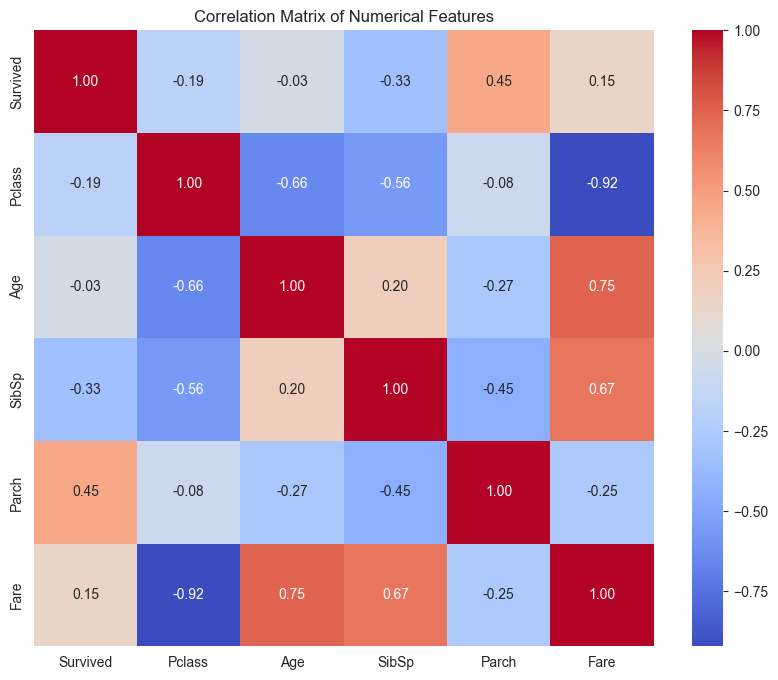

In [18]:
print("multivariate analysis ")
#select only a few numerical coumns
num_cols=['Survived', "Age","Fare","SibSp"]
sns.pairplot(df[num_cols], hue='Survived', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Survival Status', y=1.02)
plt.show()


# Correlation Heatmap
print("\n--- Correlation Heatmap ---")
# Calculate the correlation matrix
corr_matrix = df.drop(columns=['Sex', 'Embarked']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
